In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from file_readers.CriminalActFileReader import CriminalActFileReader
from file_readers.LocationFileReader import LocationFileReader
from file_readers.OffenderFileReader import OffenderFileReader
from file_readers.PropertyFileReader import PropertyFileReader
from file_readers.OffenseFileReader import OffenseFileReader
from file_readers.IncidentFileReader import IncidentFileReader

property_file_reader = PropertyFileReader()
offense_file_reader = OffenseFileReader()
incident_file_reader = IncidentFileReader()
location_file_reader = LocationFileReader()
criminal_act_file_reader = CriminalActFileReader()
offender_file_reader = OffenderFileReader()

In [2]:
incident = incident_file_reader.get_incident_df()
incident.head()

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2023,937,165629217,44294843,f,2023-02-02 15:45:57.626,2023-01-01,f,0.0,6,NaN,WARNINGS,NaN,X,172557926
1,2023,937,168896599,44294843,f,2023-03-30 02:45:11.651,2023-01-01,f,3.0,6,NaN,ACCEPTED,NaN,X,181397410
2,2023,937,166286996,44294843,f,2023-02-13 03:39:31.498,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464262
3,2023,937,166286997,44294843,f,2023-02-13 03:39:32.566,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464265
4,2023,937,166286998,44294843,f,2023-02-13 03:39:33.49,2023-01-01,f,5.0,6,NaN,ACCEPTED,NaN,X,174464268


In [3]:
property = property_file_reader.get_property_df()
property.head()

,data_year,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,date_recovered,nibrs_prop_desc_id,prop_desc_id,property_value,prop_desc_code,prop_desc_name,prop_loss_desc,prop_loss_name
73757,2023.0,162718431.0,165630349.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73764,2023.0,163287413.0,166287040.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73776,2023.0,164568031.0,167756518.0,6.0,NaN,NaN,NaN,NaN,11.0,5.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73789,2023.0,164242875.0,167374455.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73799,2023.0,164242944.0,167374530.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized


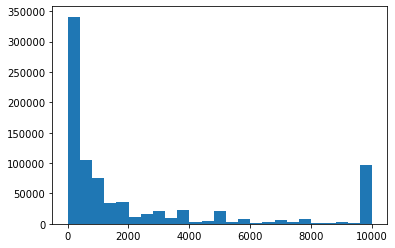

In [4]:
# HISTOGRAM OF PROPERTY VALUES
MAX_PROPERTY_VALUE_FOR_HISTOGRAM = 10000
property_values = property["property_value"].values
property_values = [min(MAX_PROPERTY_VALUE_FOR_HISTOGRAM, value) for value in property_values]

plt.hist(property_values, bins=25);

In [5]:
# LIST OF MEAN PROPERTY VALUES FOR EACH CATEGORY OF PROPERTY
property_grouped = property.groupby("prop_desc_name")
property_grouped_sort_by_mean = property_grouped["property_value"].mean().sort_values(ascending=False)
for key, value in property_grouped_sort_by_mean.items():
    print(key, int(value))

Aircraft 89726
Building Materials 19787
Watercraft 19523
Buses 19222
Collections/ Collectibles 17662
Negotiable Instruments 15324
Trucks 15286
Jewelry/ Precious Metals 14860
Recreational Vehicles 13856
Trailers 13482
Industrial Equipment 13384
Automobile 12519
Structure/ Single dwelling 12294
Farm Equipment 12193
Money 11960
Other Motor Vehicles 10121
Drugs/ Narcotics 8459
Metals, Non-Precious 8300
Aircraft Parts/ Accessories 6439
Structure/ Public 6434
Crops 6408
Livestock 5710
Structure/ Other 4448
Watercraft Equipment/ Parts/ Accessories 4443
Structure/ Other commercial 4335
Structure/ Other residence 4005
Structure/ Other industrial 3971
Medical/ Medical Lab Equipment 3512
Photographic/ Optical Equipment 3294
Pets 3246
Structure/ Storage 3180
Other 2995
Tools 2935
Musical Instruments 2824
Clothes/ Furs 2422
Computer Hard/ Software 2355
Recordings 2182
Chemicals 2120
Lawn/ Yard/ Garden Equipment 2046
Logging Equipment 1827
Vehicle Parts 1731
Law Enforcement Equipment 1563
Bicycles 1

In [6]:
# 25 MOST COSTLY INCIDENTS
dataframe = property_file_reader.get_property_df()
dataframe = offense_file_reader.merge_offense_to_df(dataframe)
dataframe = location_file_reader.merge_location_to_df(dataframe)
dataframe = criminal_act_file_reader.merge_criminal_act_to_df(dataframe)
dataframe = offender_file_reader.merge_offender_to_df(dataframe)
dataframe = dataframe.sort_values(by="property_value", ascending=False)
dataframe.head(n=25)

,data_year,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,date_recovered,nibrs_prop_desc_id,prop_desc_id,property_value,...,ethnicity_id,notes,offender_id,offender_seq_num,race_code,race_desc,race_id,sex_code,sort_order,start_year
1769788,2023.0,181193892.0,187008341.0,7.0,NaN,NaN,NaN,NaN,42.0,124465227.0,...,50.0,Race is not specified,212793341.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
932609,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064789.0,2.0,U,Unknown,98.0,M,98.0,NaN
932608,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064788.0,1.0,U,Unknown,98.0,M,98.0,NaN
932611,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064791.0,4.0,U,Unknown,98.0,M,98.0,NaN
932610,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,40.0,Race is explicitly unknown,199064790.0,3.0,U,Unknown,98.0,M,98.0,NaN
1671545,2023.0,172105935.0,176448290.0,7.0,NaN,NaN,NaN,NaN,63.0,66000000.0,...,50.0,Race is not specified,200329976.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
937591,2023.0,175894945.0,180899008.0,3.0,NaN,NaN,NaN,NaN,20.0,54158500.0,...,50.0,Race is not specified,205625106.0,0.0,NS,Not Specified,99.0,X,99.0,NaN
1707654,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969312.0,2.0,W,White,10.0,M,10.0,NaN
1707659,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969311.0,1.0,W,White,10.0,F,10.0,NaN
1707660,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,50.0,NaN,200969312.0,2.0,W,White,10.0,M,10.0,NaN


In [7]:
dataframe[["property_value", "sex_code"]].head(n=50)

,property_value,sex_code
1769788,124465227.0,X
932609,73455869.0,M
932608,73455869.0,M
932611,73455869.0,M
932610,73455869.0,M
1671545,66000000.0,X
937591,54158500.0,X
1707654,23647110.0,M
1707659,23647110.0,F
1707660,23647110.0,M
